## Logistic regression practice 
- Multi Classify

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load dataset from sklearn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

x_org, y_org = iris.data, iris.target
print('Orginal data shape：{}, Label data shape：{}'.format(x_org.shape, y_org.shape))

Orginal data shape：(150, 4), Label data shape：(150,)


In [3]:
# do ONE-HOT ENCODING 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='auto')
y_all_one = ohe.fit_transform(np.c_[y_org])
print('Shape of orginal data：{}'.format(y_org.shape))
print('shape after One Hot-encoding：{}'.format(y_all_one.shape))

Shape of orginal data：(150,)
shape after One Hot-encoding：(150, 3)


In [4]:
x_data_insert = np.insert(x_org, 0, 1.0, axis=1)
print('insert dummy variable', x_data_insert.shape)

insert dummy variable (150, 5)


### Split dataset
- Split data into 50% training data and 50% testing data

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_data_insert, y_org, y_all_one, train_size=75, test_size=75, random_state=123)

print("shape of ...："+"\n"+ " x_train：{}, x_test：{}, y_train：{}, y_test：{}, y_train_one：{}, y_test_one：{}"
     .format(x_train.shape, x_test.shape, y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape))

print("label y =", (y_train[:5]) )
print("label y after one ot encoding =", (y_train_one[:5,:]))

shape of ...：
 x_train：(75, 5), x_test：(75, 5), y_train：(75,), y_test：(75,), y_train_one：(75, 3), y_test_one：(75, 3)
label y = [1 1 0 2 2]
label y after one ot encoding = [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Function define

#### Softmax function 
- softmax 函式將陣列中的所有元素在區間 (0,1) 內進行歸一化處理，使其可以作為概率處理。
- 應用softmax時，常見的問題是數值穩定性問題，也就是說，由於可能出現的指數和溢位誤差，∑j e^(z_j)可能會變得非常大。這個溢位誤差可以通過用陣列的每個值減去其最大值來解決。
![Softmax](https://www.delftstack.com/img/Numpy/softmax%20formula.png)

In [6]:
def softmax(x):   
    max_row = np.max(x, axis=1, keepdims=True) # returns max of each row and keeps same dims
    e_x = np.exp(x - max_row)                  # subtracts each row with its max value
    sum_e = np.sum(e_x, axis=1, keepdims=True) # returns sum of each row and keeps same dims
    f_x = e_x / sum_e 
    return f_x

def predict_(x, w):
    return softmax(np.dot(x, w))

def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

In [ ]:
def softmax(x):   
    ### Code here ### 
    return f_x

def predict_(x, w):
    return ### ?????? ###

def cross_entropy(yt, yp):
    return ### ?????? ###

In [7]:
from sklearn.metrics import accuracy_score

def evaluate(x_test, y_test, y_test_one, weight):
    pred_y_test_one = predict_(x_test, weight)
    pred_y_test = np.argmax(pred_y_test_one, axis=1)

    loss = cross_entropy(y_test_one, pred_y_test_one)
    score = accuracy_score(y_test, pred_y_test)
    return loss, score

def train(x_train, y_train_one, x_test, y_test, lr, iteration):
    num_data = x_train.shape[0] # 樣本數
    dim_data = x_train.shape[1] # 輸入資料的 shape
    num_class = y_train_one.shape[1]    # 有幾個分類
    
    # intizlize weight and loss repository
    weight = np.ones((dim_data, num_class)) 
    loss_repos = np.zeros((0, num_class))

    for k in range(iteration):
        pred_y = predict_(x_train, weight)
        err = pred_y - y_train_one
        weight = weight - lr * np.dot(x_train.T, err) / num_data
        if (k % 10 == 0):
            loss, score = evaluate(x_test, y_test, y_test_one, weight)
            loss_repos = np.vstack((loss_repos, np.array([k, loss, score])))
            print("epoch = %d loss = %f score = %f" % (k, loss, score))
    return loss_repos, weight

In [8]:
# Set epoch and iteration
iteration = 10000
learning_rate = 0.01

In [9]:
loss_set, update_weight = train(x_train, y_train_one, x_test, y_test, learning_rate, iteration)

epoch = 0 loss = 1.091583 score = 0.266667
epoch = 10 loss = 1.041711 score = 0.266667
epoch = 20 loss = 0.988501 score = 0.266667
epoch = 30 loss = 0.939962 score = 0.573333
epoch = 40 loss = 0.897037 score = 0.626667
epoch = 50 loss = 0.859177 score = 0.626667
epoch = 60 loss = 0.825724 score = 0.626667
epoch = 70 loss = 0.796070 score = 0.626667
epoch = 80 loss = 0.769683 score = 0.653333
epoch = 90 loss = 0.746103 score = 0.653333
epoch = 100 loss = 0.724936 score = 0.693333
epoch = 110 loss = 0.705850 score = 0.746667
epoch = 120 loss = 0.688561 score = 0.760000
epoch = 130 loss = 0.672832 score = 0.760000
epoch = 140 loss = 0.658461 score = 0.786667
epoch = 150 loss = 0.645275 score = 0.786667
epoch = 160 loss = 0.633131 score = 0.786667
epoch = 170 loss = 0.621903 score = 0.813333
epoch = 180 loss = 0.611485 score = 0.813333
epoch = 190 loss = 0.601788 score = 0.840000
epoch = 200 loss = 0.592731 score = 0.840000
epoch = 210 loss = 0.584248 score = 0.880000
epoch = 220 loss = 0.

epoch = 2010 loss = 0.271927 score = 0.960000
epoch = 2020 loss = 0.271335 score = 0.960000
epoch = 2030 loss = 0.270748 score = 0.960000
epoch = 2040 loss = 0.270164 score = 0.960000
epoch = 2050 loss = 0.269584 score = 0.960000
epoch = 2060 loss = 0.269007 score = 0.960000
epoch = 2070 loss = 0.268434 score = 0.960000
epoch = 2080 loss = 0.267865 score = 0.960000
epoch = 2090 loss = 0.267299 score = 0.960000
epoch = 2100 loss = 0.266736 score = 0.960000
epoch = 2110 loss = 0.266177 score = 0.960000
epoch = 2120 loss = 0.265621 score = 0.960000
epoch = 2130 loss = 0.265069 score = 0.960000
epoch = 2140 loss = 0.264520 score = 0.960000
epoch = 2150 loss = 0.263974 score = 0.960000
epoch = 2160 loss = 0.263431 score = 0.960000
epoch = 2170 loss = 0.262892 score = 0.960000
epoch = 2180 loss = 0.262356 score = 0.960000
epoch = 2190 loss = 0.261823 score = 0.960000
epoch = 2200 loss = 0.261293 score = 0.960000
epoch = 2210 loss = 0.260767 score = 0.960000
epoch = 2220 loss = 0.260243 score

epoch = 4210 loss = 0.194781 score = 0.960000
epoch = 4220 loss = 0.194574 score = 0.960000
epoch = 4230 loss = 0.194368 score = 0.960000
epoch = 4240 loss = 0.194163 score = 0.960000
epoch = 4250 loss = 0.193959 score = 0.960000
epoch = 4260 loss = 0.193755 score = 0.960000
epoch = 4270 loss = 0.193552 score = 0.960000
epoch = 4280 loss = 0.193350 score = 0.960000
epoch = 4290 loss = 0.193149 score = 0.960000
epoch = 4300 loss = 0.192948 score = 0.960000
epoch = 4310 loss = 0.192748 score = 0.960000
epoch = 4320 loss = 0.192549 score = 0.960000
epoch = 4330 loss = 0.192351 score = 0.960000
epoch = 4340 loss = 0.192153 score = 0.960000
epoch = 4350 loss = 0.191956 score = 0.960000
epoch = 4360 loss = 0.191760 score = 0.960000
epoch = 4370 loss = 0.191564 score = 0.960000
epoch = 4380 loss = 0.191369 score = 0.960000
epoch = 4390 loss = 0.191175 score = 0.960000
epoch = 4400 loss = 0.190982 score = 0.960000
epoch = 4410 loss = 0.190789 score = 0.960000
epoch = 4420 loss = 0.190597 score

epoch = 6410 loss = 0.162492 score = 0.960000
epoch = 6420 loss = 0.162388 score = 0.960000
epoch = 6430 loss = 0.162285 score = 0.960000
epoch = 6440 loss = 0.162181 score = 0.960000
epoch = 6450 loss = 0.162078 score = 0.960000
epoch = 6460 loss = 0.161975 score = 0.960000
epoch = 6470 loss = 0.161873 score = 0.960000
epoch = 6480 loss = 0.161771 score = 0.960000
epoch = 6490 loss = 0.161669 score = 0.960000
epoch = 6500 loss = 0.161567 score = 0.960000
epoch = 6510 loss = 0.161465 score = 0.960000
epoch = 6520 loss = 0.161364 score = 0.960000
epoch = 6530 loss = 0.161263 score = 0.960000
epoch = 6540 loss = 0.161163 score = 0.960000
epoch = 6550 loss = 0.161062 score = 0.960000
epoch = 6560 loss = 0.160962 score = 0.960000
epoch = 6570 loss = 0.160862 score = 0.960000
epoch = 6580 loss = 0.160763 score = 0.960000
epoch = 6590 loss = 0.160663 score = 0.960000
epoch = 6600 loss = 0.160564 score = 0.960000
epoch = 6610 loss = 0.160465 score = 0.960000
epoch = 6620 loss = 0.160367 score

epoch = 8560 loss = 0.145085 score = 0.960000
epoch = 8570 loss = 0.145022 score = 0.960000
epoch = 8580 loss = 0.144959 score = 0.960000
epoch = 8590 loss = 0.144897 score = 0.960000
epoch = 8600 loss = 0.144834 score = 0.960000
epoch = 8610 loss = 0.144772 score = 0.960000
epoch = 8620 loss = 0.144709 score = 0.960000
epoch = 8630 loss = 0.144647 score = 0.960000
epoch = 8640 loss = 0.144585 score = 0.960000
epoch = 8650 loss = 0.144523 score = 0.960000
epoch = 8660 loss = 0.144462 score = 0.960000
epoch = 8670 loss = 0.144400 score = 0.960000
epoch = 8680 loss = 0.144338 score = 0.960000
epoch = 8690 loss = 0.144277 score = 0.960000
epoch = 8700 loss = 0.144216 score = 0.960000
epoch = 8710 loss = 0.144155 score = 0.960000
epoch = 8720 loss = 0.144093 score = 0.960000
epoch = 8730 loss = 0.144033 score = 0.960000
epoch = 8740 loss = 0.143972 score = 0.960000
epoch = 8750 loss = 0.143911 score = 0.960000
epoch = 8760 loss = 0.143851 score = 0.960000
epoch = 8770 loss = 0.143790 score

In [10]:
print('First epoch result: Loss:{:f}, Accur：{:f}'.format(loss_set[0,1], loss_set[0,2]))
print('Final epoch result: Loss:{:f}, Accur：{:f}'.format(loss_set[-1,1], loss_set[-1,2]))

First epoch result: Loss:1.091583, Accur：0.266667
Final epoch result: Loss:0.137235, Accur：0.960000


### Plot learning curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


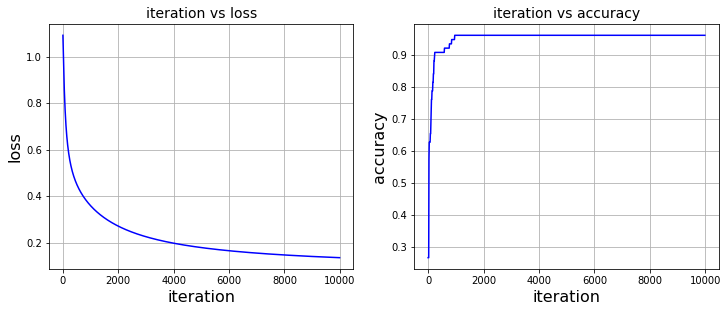

In [11]:
xmin, xmax, num = 0.01, 10, 100      
x = np.linspace(xmin, xmax, num)     

# 建立繪圖物件 fig, 大小為 12 * 4.5, 內有 1 列 2 欄的小圖, 兩圖共用 x 軸和 y 軸
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4.5))

ax1.plot(loss_set[:,0], loss_set[:,1], 'b')
ax1.set_title('iteration vs loss', fontsize=14)
ax1.set_xlabel('iteration', fontsize = 16)
ax1.set_ylabel('loss', fontsize = 16)
ax1.grid(True)

ax2.plot(loss_set[:,0], loss_set[:,2], 'b')
ax2.set_title('iteration vs accuracy', fontsize=14)
ax2.set_xlabel('iteration', fontsize = 16)
ax2.set_ylabel('accuracy',  fontsize = 16)
ax2.grid(True)

fig.show()

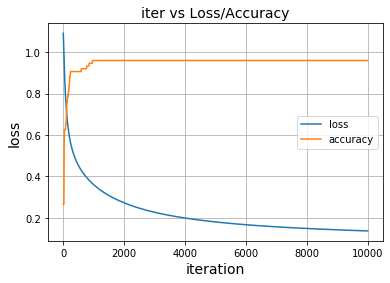

In [12]:
# learning curve 
plt.plot(loss_set[:,0], loss_set[:,1], label='loss')
plt.plot(loss_set[:,0], loss_set[:,2], label='accuracy')
plt.xlabel('iteration', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs Loss/Accuracy', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()